In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data=pd.read_csv("student-data.csv")

In [73]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [75]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [76]:
data.isnull().values.any()

False

In [77]:
features=data.columns[:-1]

In [78]:
print(features)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')


In [79]:
x=data[features]

In [80]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [81]:
target=data.columns[-1]
y=data[target]

In [82]:
print("RAtio of passed and failed: ",y.value_counts(normalize=True))

RAtio of passed and failed:  yes    0.670886
no     0.329114
Name: passed, dtype: float64


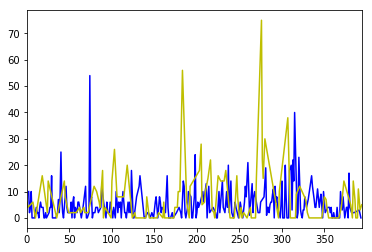

In [139]:
data[data['passed']=='yes']['absences'].plot(c='b')
data[data['passed']=='no']['absences'].plot(c='y')

In [84]:
np.mean(data[data['passed']=='yes']['absences'])

5.192452830188679

In [85]:
np.mean(data[data['passed']=='no']['absences'])

6.7615384615384615

In [86]:
data[data['passed']=='yes']['sex'].value_counts()

F    133
M    132
Name: sex, dtype: int64

In [87]:
data[data['passed']=='no']['sex'].value_counts()

F    75
M    55
Name: sex, dtype: int64

In [88]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


## Above value show correlation of features among each other. Higher and positive means stronger correlation

In [89]:
data=data.dropna()

In [90]:
data.shape

(395, 31)

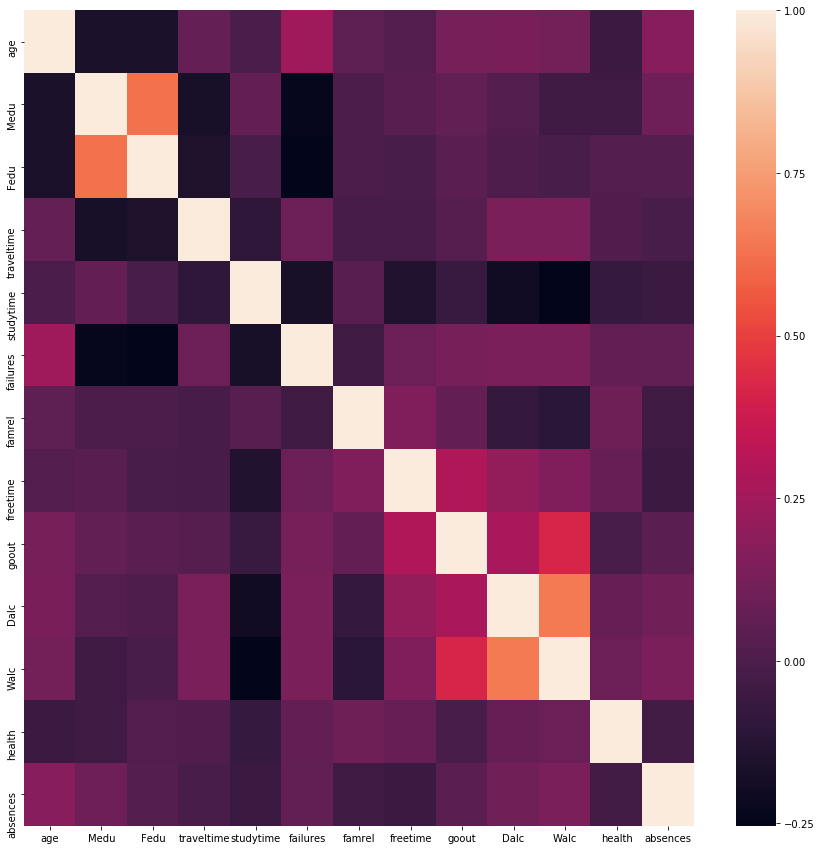

In [91]:
corr=data.corr()
figure=plt.figure(figsize=(15,15))
sns.heatmap(corr)

## Visualizing categorical variables

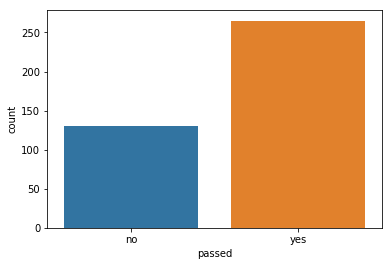

In [114]:
sns.countplot(x=data['passed'],data=data)

* we have more number of students who passed

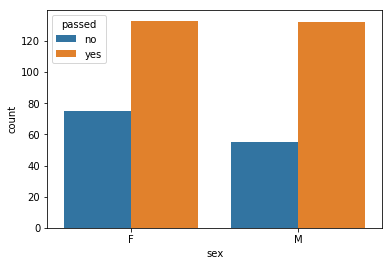

In [107]:
sns.countplot(x='sex',hue='passed',data=data)

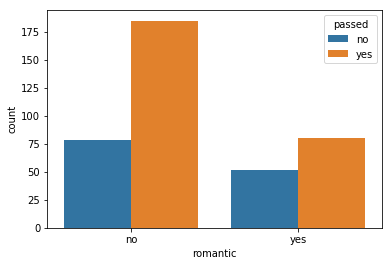

In [108]:
sns.countplot(x='romantic',hue='passed',data=data)

 * Romance doesn't help!

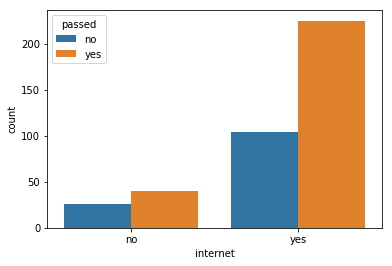

In [109]:
sns.countplot(x='internet',hue='passed',data=data)

* Internet Does (a lot)

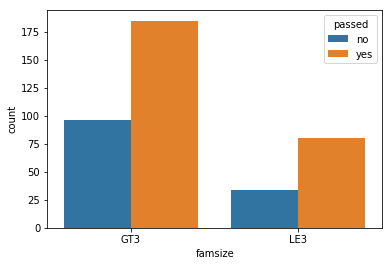

In [115]:
sns.countplot(x='famsize',hue='passed',data=data)

In [116]:
data['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

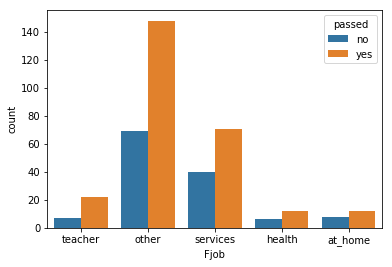

In [117]:
sns.countplot(x='Fjob',hue='passed',data=data)

In [118]:
data['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

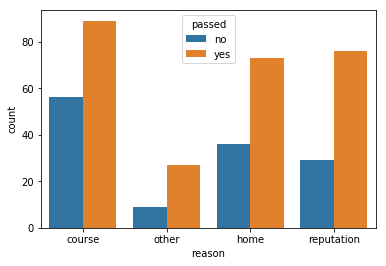

In [120]:
sns.countplot(x='reason',hue='passed',data=data)

In [122]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

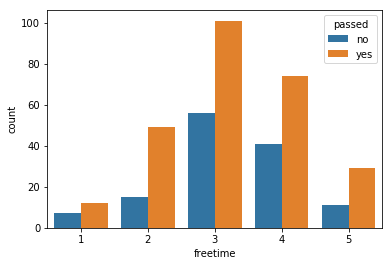

In [123]:
sns.countplot(x='freetime',hue='passed',data=data)

* Can we say amount free time should be moderate? (I'd say discipline is freedom)

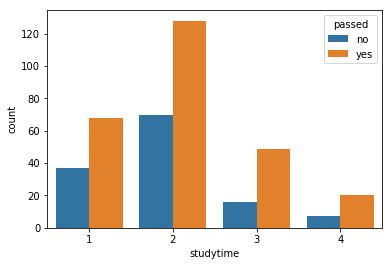

In [124]:
sns.countplot(x='studytime',hue='passed',data=data)

* self reported study time

In [126]:
data['activities'].unique()

array(['no', 'yes'], dtype=object)

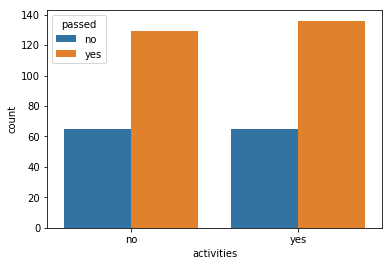

In [127]:
sns.countplot(x='activities',hue='passed',data=data)

In [128]:
data['health'].unique()

array([3, 5, 1, 2, 4], dtype=int64)

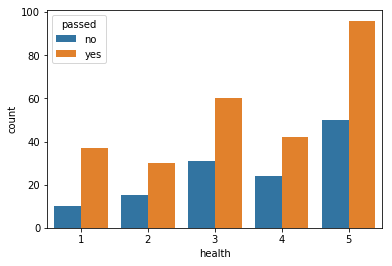

In [129]:
sns.countplot(x='health',hue='passed',data=data)

* good health encourages chances of passing

In [130]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

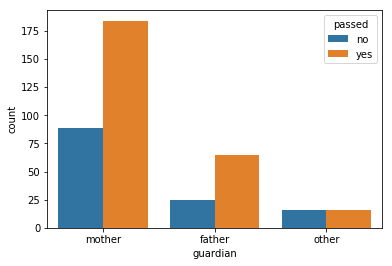

In [131]:
sns.countplot(x='guardian',hue='passed',data=data)

* mothers make homes

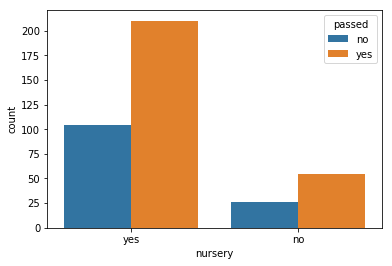

In [132]:
sns.countplot(x='nursery',hue='passed',data=data)

In [134]:
data['paid'].unique()

array(['no', 'yes'], dtype=object)

In [136]:
data['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

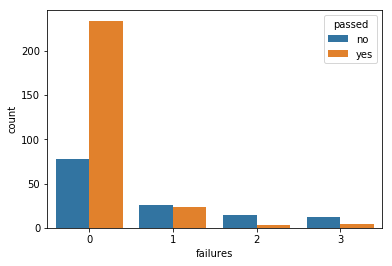

In [137]:
sns.countplot(x='failures',hue='passed',data=data)

* more failures = more learning ?

In [140]:
data['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

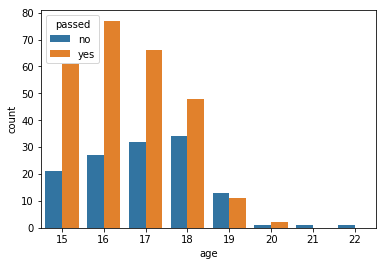

In [146]:
sns.countplot(x='age',hue='passed',data=data)